In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import geopandas as gpd


import warnings
warnings.filterwarnings('ignore')

In [3]:
Data = pd.read_csv('bk_light_density.csv')

In [4]:
Data = Data.drop(columns=['population','area_ft','geometry','area_mile'])
Data

,Unnamed: 0,ZIPCODE,lights_number,density
0,0,11201,948,643.114637
1,1,11203,578,265.706306
2,2,11204,1083,693.196630
3,3,11205,391,468.430816
4,4,11206,649,444.539585
5,5,11207,1237,466.233936
6,6,11208,1068,375.444489
7,7,11209,958,461.729578
8,8,11210,437,254.408398
9,9,11211,669,460.841198


In [5]:
Bk_zipcode = pd.read_csv("zipcode_bk.csv")
Bk_zipcode = Bk_zipcode.drop(columns=['PO_NAME','POPULATION','AREA','ST_FIPS','CTY_FIPS'])
Bk_zipcode

,ZIPCODE,geometry
0,11213,POLYGON ((1001613.7129640579 186926.4395172149...
1,11212,"POLYGON ((1011174.275535807 183696.33770971, 1..."
2,11225,POLYGON ((995908.3654508889 183617.61280155182...
3,11218,"POLYGON ((991997.1134308875 176307.4958601296,..."
4,11226,"POLYGON ((994821.4729396403 177865.7178093046,..."
5,11219,"POLYGON ((987286.3515269756 173946.4621963799,..."
6,11210,POLYGON ((995796.0097044706 171110.06662246585...
7,11230,POLYGON ((994099.2959063053 171240.70645305514...
8,11204,POLYGON ((989500.1699339747 170730.16876021028...
9,11222,"POLYGON ((996935.7633304745 208556.5094459653,..."


In [25]:
lights_geo   = pd.merge(Data,Bk_zipcode,how='left')

In [30]:
lights_geo = gpd.GeoDataFrame(lights_geo,geometry='geometry')

TypeError: Input must be valid geometry objects: POLYGON ((990158.9799680561 196291.40307071805, 990132.7103355676 196196.9088371396, 990013.0455486476 196041.1053429693, 989992.8982792348 196018.75794671476, 989926.1441476494 195867.7365952134, 989916.6097178906 195849.26156654954, 989905.3640054762 195827.46961538494, 989887.9145653099 195793.65669088066, 989798.500045985 195595.97073455155, 989738.4030533135 195464.13372787833, 989735.4581773132 195455.5474589616, 989735.506733641 195449.20101496577, 989733.1661871374 195421.90152888, 989499.9668504 194936.1213324666, 989555.0566352308 194835.3180563897, 989646.2582244724 194671.92796321213, 989669.5734665543 194615.97236646712, 989678.6994325668 194594.06985121965, 989681.9441767335 194532.43250730634, 989670.8483983874 194275.46189263463, 989669.1374438107 194235.82352046669, 989667.4904654771 194197.67858363688, 989666.2342343926 194162.88042488694, 989644.8448414803 193716.51550397277, 989644.8645264804 193666.9755768031, 989701.44052881 193659.74199546874, 989999.999971062 193644.26761697233, 990447.1696804017 193621.52258370817, 990480.3933672309 193619.55670838058, 990483.535093233 193571.54138445854, 990511.4602342248 193190.83807763457, 990518.7764925659 193090.7930021286, 990519.319798559 193083.36716397107, 990522.5442015678 193039.27899755538, 990523.0629013181 193031.8944978863, 990523.6183463931 192983.55469955504, 990523.7814038098 192961.3408332169, 990523.9602092206 192937.2126006335, 990523.8791726381 192913.2247877121, 990509.4920623153 192914.2018198818, 990344.2952142209 192925.41964522004, 990306.8313784003 192927.6939188838, 990255.2845654786 192930.46359838545, 990262.1736593097 192886.0532541275, 990300.726731807 192637.53865930438, 990302.8008746505 192624.1692634672, 990306.2523113042 192601.92160454392, 990322.0823321491 192499.87850154936, 990334.7050103098 192418.51350679994, 990333.8155763894 192410.86293154955, 990332.6282428056 192403.25271055102, 990329.3723438084 192388.198606804, 990319.5925077349 192359.61172170937, 990313.9806423038 192329.71447180212, 990330.2722764015 192302.85855437815, 990335.8739712238 192288.92846412957, 990343.4759901464 192268.81006604433, 990347.9225035608 192251.4190247208, 990348.8125936389 192245.32159596682, 990354.6321358085 192213.39416638017, 990359.4641471505 192177.7469279617, 990370.8791505545 192101.09353797138, 990375.9414763898 192067.11361904442, 990386.4473608881 191997.37655380368, 990398.8092128038 191915.3225840479, 990947.5121836513 191887.2970495522, 991186.7065871507 191875.6596056372, 991286.6844055653 191870.79609829187, 991414.3701738119 191864.58384038508, 991500.3145557344 191860.4024183005, 991507.0074557215 191813.18958622217, 991582.1332897246 191321.22961212695, 991587.7143153101 191285.16964487731, 991594.1903522313 191237.82623563707, 991614.8389329761 191107.015473634, 991702.6989934742 190525.31683388352, 991669.7013560683 190526.9815287143, 991612.144384563 190529.8863785416, 991489.8080150634 190536.05893838406, 991430.177884981 190540.05893038213, 991376.5979396403 190541.46903255582, 991208.3502446413 190550.14224354923, 991153.7912986428 190552.70555862784, 990930.8432537317 190564.02902680635, 990877.4913263172 190566.8426694721, 990844.1672459841 190568.29575054348, 990821.8582354784 190568.87547379732, 990654.1272717267 190577.87775237858, 990601.2540178895 190580.03325988352, 990563.5861142278 190581.83082847297, 990367.9162299782 190592.0903223753, 990320.9714419842 190594.3075095415, 990177.801780805 190600.9810526371, 989999.999971062 190610.03319987655, 989983.4402928948 190610.97381480038, 989968.9970803112 190611.66967955232, 989932.2651983947 190612.67952005565, 989936.166437313 190573.0227752179, 989994.7670418918 190026.5077921301, 989950.6293348968 190048.4336013049, 989775.9584243894 190140.0174076259, 989757.2484880686 190149.8658131361, 989749.784920305 190153.83463720977, 989725.1114132255 190166.4176173061, 989689.5130592287 190183.72565354407, 989682.264057979 190186.92873112857, 989674.7171570659 190192.46841821074, 989658.2811663151 190203.20297679305, 989648.8910932243 190208.9506687224, 989539.0045019835 190262.91283112764, 989562.7442838997 190211.23773762584, 989453.9331498146 189999.878580302, 989428.9423861504 189952.68608938158, 989408.2324538082 189913.5765875429, 989377.1646025628 189929.43876054883, 989239.203264311 189999.878580302, 989072.8965103179 190084.61922445893, 989043.7092327327 190100.87542554736, 989004.3769623041 190119.34553296864, 988832.7654289007 190206.3538891375, 988805.7654828876 190220.04283812642, 988787.8321198076 190185.20859020948, 988690.6722091436 189997.30575080216, 988627.3104592264 190029.68002988398, 988551.4303616434 190068.4499654621, 988539.1515148133 190074.72390304506, 988409.7403563112 190140.8454899639, 988116.318370983 190290.76677805185, 988089.4929653108 190304.4524462223, 988071.9890633076 190270.48138554394, 987991.9544464797 190115.15754921734, 987975.0223937333 190082.29672254622, 987962.0191388875 190056.9906708002, 987932.6724128127 189999.878580302, 987877.3516573161 189893.33450205624, 987855.3074100614 189850.87986254692, 987835.4665704817 189812.33860105276, 987750.4362287223 189647.16439071298, 987736.303054899 189619.70939312875, 987723.2850363106 189594.41384005547, 987631.7704555541 189416.59989121556, 987617.1881356388 189388.2646460533, 987604.1563375592 189362.98352862895, 987497.9350933135 189156.99345505238, 987395.518959567 188958.47482322156, 987380.7630835623 188922.32102413476, 987367.0380453914 188888.69281055033, 987282.9315863103 188724.1734545529, 987265.1816218048 188690.8969462961, 987247.4992424846 188656.718536973, 987240.4274062216 188642.80255429447, 987218.5193135589 188599.80460879207, 987146.4462949783 188459.97680446506, 987045.2024029791 188264.5818540454, 987025.7250797302 188227.94872520864, 986415.6318117231 188541.02060563862, 986337.6234375685 188580.75445005298, 986277.713124305 188611.2701370418, 985785.5723763108 188861.94745720923, 985753.7351696491 188876.8138972968, 985788.6383150667 188974.3058283031, 985800.888618648 189005.19159330428, 985764.4490589797 189020.1656447202, 985742.5665568113 189029.73353897035, 985693.7740034759 189051.0658453852, 985562.8457876444 189108.30884113908, 985529.7694102228 189122.72055771947, 985492.9591163993 189138.83961996436, 985260.0452121496 189239.70260721445, 985005.0752496421 189349.78768888116, 984752.311975643 189459.5233618021, 984709.808451727 189478.4144001305, 984644.1461814791 189507.45174363256, 984602.96024023 189525.6656179726, 984576.6584555656 189537.2965002209, 984546.2044482231 189550.01366637647, 984518.4075878114 189561.1789983809, 984334.2350558937 189641.08959971368, 984321.7659207284 189646.49936579168, 984303.5005373061 189654.63583245873, 984266.8733139783 189670.95141662657, 984248.1000575572 189679.31458888948, 984235.1912907213 189684.87494520843, 984129.6954387277 189730.3148149699, 984100.7404441386 189743.93585070968, 984066.4426124841 189758.37282972038, 983898.0216894746 189831.071503222, 983864.8800234795 189842.84280513227, 983282.20271115 190085.49651929736, 983038.3511647284 189444.10672596097, 982975.2308841497 189278.1004962921, 982957.8792128116 189231.0854984671, 982950.3834929019 189210.7764839679, 982927.0626733899 189147.5896024704, 982920.0603908151 189128.59456171095, 982904.228729561 189083.73999263346, 982742.6850893945 189142.86454629898, 982725.422328651 189149.1827751249, 982347.7242651433 189292.9997447133, 982195.8800806403 189350.82213562727, 982258.5902570635 189389.31844972074, 982264.7441161424 189390.8807825446, 982278.780505389 189393.24855996668, 982300.7000809759 189398.41849713027, 982306.1800568998 189398.9486798048, 982312.1511735618 189398.28627954423, 982318.535019055 189396.43851421773, 982325.1403208077 189393.45853330195, 982330.2692475617 189389.50644145906, 982340.6143712252 189376.45987963676, 982344.8696120679 189372.651816383, 982376.770138815 189355.12822937965, 982421.2703778893 189331.12860547006, 982434.466217652 189324.27461655438, 982445.6948697269 189318.99477146566, 982456.1361218095 189314.73657788336, 982466.040301472 189311.40850055218, 982473.4313628078 189309.83468480408, 982488.9021323919 189308.22642029822, 982495.4296783954 189307.11848288774, 982527.421412304 189298.74940513074, 982539.6900885552 189295.98858387768, 982547.5562145561 189294.74055488408, 982565.0210746378 189292.65919421613, 982572.3002595603 189291.43839612603, 982607.7801754773 189283.66872663796, 982622.5330987275 189282.2943855524, 982688.6989768893 189493.904526636, 982699.9604373127 189521.5314398855, 982733.2451476455 189602.7346895486, 982752.3901224732 189649.43866437674, 982762.5620181412 189665.29427571595, 982771.2204653919 189676.75849163532, 982799.8201457262 189710.61866013706, 982829.8499413133 189744.29871088266, 982834.811217472 189751.1746813804, 982839.3692792207 189759.76948046684, 982843.2160563171 189769.6707073748, 982845.6720881462 189777.99450963736, 982900.4698788077 189904.51820671558, 982939.2102869004 189971.43867655098, 982956.0380091518 189999.878580302, 982965.8916639835 190016.52946563065, 983009.4844245613 190081.1093889624, 983027.9473141432 190107.41412638128, 983045.469916895 190131.59846121073, 983064.8461904824 190158.93173988163, 983074.2362635583 190171.15415638685, 983084.4859149754 190182.50026230514, 983089.5931882262 190187.28962279856, 983094.7703432292 190191.56815755367, 983133.3106204718 190220.65865054727, 983154.545814231 190235.62023480237, 983164.3299153894 190243.35873638093, 983170.9476843178 190250.71862979233, 983179.1704368889 190263.58868280053, 983187.475210309 190277.4554529637, 983231.6598332226 190401.5982493013, 983298.6793842316 190519.72826237977, 983313.5363098979 190545.53857821226, 983320.8263215572 190558.2025948763, 983338.5703805685 190590.57260888815, 983353.918446973 190620.50069862604, 983367.2399426401 190648.73817496002, 983372.2222161442 190660.6771274656, 983380.1021216512 190682.072425887, 983385.1828201413 190699.25382196903, 983388.3511208892 190712.56153813004, 983390.940026477 190724.88828513026, 983411.1968757212 190789.1844163835, 983419.5173971504 190815.5895473063, 983472.2482628077 190798.368781209, 983524.2202717215 190779.06862296164, 983709.2399148047 190713.35812446475, 983737.1302789748 190791.1286382228, 983747.570218727 190795.6286292225, 983984.6904793978 190708.33844946325, 984049.4203368127 190885.63861979544, 983928.6702502221 190929.92855747044, 983586.9202775657 191053.81872963905, 983596.8831841499 191081.4597504586, 983623.5888393968 191155.54654455185, 983651.8227068186 191233.87151913345, 983678.8193719834 191308.7647420466, 983688.2944186479 191335.05110679567, 983691.6100288182 191344.2485949695, 983703.4102020562 191377.47621880472, 983729.4711735547 191450.8586179614, 983760.162057057 191537.2797049582, 983763.1302269846 191545.63565938175, 983859.2855464816 191809.26242871583, 983870.6362455636 191840.38539797068, 983880.8442303985 191868.37156246603, 983912.5482352227 191957.25557105243, 983931.6807428896 192003.53828687966, 983981.2990819812 192141.69680321217, 983771.1702371389 192236.7284373045, 983602.9100749791 192313.46844129264, 983429.4760386497 192392.80260021985, 983421.7142431438 192412.04403154552, 983464.1111399829 192499.87850154936, 983573.0462895632 192725.55554363132, 983591.8300446421 192732.61884970963, 983692.9902753979 192686.81841638684, 983990.5802313983 192550.51816405356, 984103.1863053888 192499.87850154936, 984187.7113988101 192499.87850154936, 984224.4698554724 192579.10865804553, 984267.6236405671 192670.57566671073, 984365.6050718874 192870.9338617921, 984406.8097139001 192968.41824688017, 984398.120098725 192980.8384976387, 984394.9104594737 192986.99859030545, 984393.0164344013 192996.7370878756, 984391.1371730566 193002.92375530303, 984386.8563417345 193007.29579380155, 984380.2671160549 193010.81678412855, 984374.7346468121 193012.86369605362, 984367.2802653909 193017.63435579836, 984362.4600650668 193021.6182717085, 984357.5903241485 193026.27869546413, 984359.9190596491 193032.72750146687, 984410.9501255602 193173.9864052981, 984481.2587119788 193165.86470238864, 984528.7822389752 193144.43856413662, 984572.2490155548 193266.9806418866, 984549.5043103993 193277.56723488867, 984442.476309225 193325.70329347253, 984321.4637559801 193380.4882888794, 984165.1412339807 193451.14070662856, 984079.2578755617 193490.32730804384, 984016.9092469811 193518.64352437854, 983978.7311737239 193535.98207238317, 983972.6442436427 193552.6985743791, 983991.3203873932 193591.43865437806, 984033.6182030588 193680.5077019632, 984057.6181550622 193731.0935588032, 984071.1499521434 193758.89566855133, 984112.5842524767 193845.82954980433, 984130.7544917315 193852.64351254702, 984247.4520929754 193799.9028043896, 984274.5320913047 193787.7220544666, 984420.8470873982 193721.71562479436, 984562.9829579741 193656.8004003018, 984697.2153010666 193595.88287121058, 984763.8103122264 193738.41965962946, 984813.5982704014 193845.16157212853, 984793.7958165556 193855.87939846516, 984595.050151065 193947.35854621232, 984462.3561907262 194007.34956796467, 984251.9212441444 194102.40777680278, 984245.2890395671 194119.48779512942, 984316.1560238153 194267.47273537517, 984386.6594917327 194415.00360830128, 984403.1935793906 194421.18174554408, 984617.5583081394 194324.3738683015, 984806.4854237288 194238.7418217212, 984950.074375391 194174.09857830405, 985000.0001285672 194312.03662262857, 985016.8544255644 194358.60247437656, 985000.0001285672 194371.98466546834, 984920.7463500649 194434.90547138453, 984868.6539345682 194476.64226454496, 984755.0580331385 194566.3441848755, 984708.4964464754 194602.82245838642, 984631.4273748994 194664.0838187933, 984630.0638605654 194680.61856263876, 984707.8799778968 194780.22761538625, 984768.9782809019 194857.8547567129, 984818.5382211506 194926.57870063186, 984876.3412551433 194999.87842279673, 985000.0001285672 195156.69372595847, 985084.3250911385 195262.7486319691, 985132.0221742243 195323.4335499704, 985252.5360408127 195476.73475255072, 985292.9214587212 195527.56043830514, 985311.0903856456 195531.1034102142, 985372.1450535655 195502.57131505013, 985494.5923152268 195439.94578413665, 985598.2115305662 195390.8687825501, 985619.9601747245 195442.87655255198, 985622.2898944765 195448.16066271067, 985629.3958513886 195464.2784126252, 985633.5385596454 195468.65077921748, 985638.2560698986 195472.44867187738, 985643.5513348877 195476.012313053, 985650.4555205554 195479.11959029734, 985659.8911972344 195481.07529504597, 985665.8741248995 195481.19176463783, 985671.0519360602 195480.8459648043, 985677.3813197315 195479.81053379178, 985690.0532103926 195506.0526072979, 985727.5521511436 195558.3986312151, 985700.1686757207 195587.8536248058, 985671.0591538996 195613.7400559634, 985666.1110010594 195609.71316112578, 985638.6103999019 195636.6396164596, 985645.8594011515 195643.5431459695, 985669.2661784738 195694.52171854675, 985672.6821821481 195700.91245380044, 985687.2874678969 195728.24146738648, 985697.7641529739 195747.84346230328, 985700.8441993147 195753.60657413304, 985701.3852087259 195773.9654573053, 985692.2402139008 195784.3755414635, 985692.8163282275 195797.60845462978, 985724.8041251451 195828.39776313305, 985749.8342588097 195852.4885942191, 985762.5435509831 195864.72249363363, 985784.1855680645 195885.55316063762, 985818.9341862351 195918.99961604178, 985952.3591162264 195965.1927651316, 985965.132384643 195957.9431077093, 985974.1730489731 195935.09440013766, 985979.0703488886 195936.9887533039, 985985.9699413925 195941.47824563086, 985993.9403978884 195947.17869354784, 986003.2202349752 195952.15867047012, 986013.3580099791 195954.861749053, 986018.5942199826 195956.91555070877, 986024.6004415601 195961.1684949696, 986030.7739856392 195968.1501082927, 986034.622075066 195971.39452438056, 986039.8202273995 195973.7081680447, 986051.8106889725 195976.48867429793, 986061.9701174796 195979.34857670963, 986068.6603928059 195981.83840113878, 986072.2102544755 195986.18845805526, 986073.550474897 195992.22847221792, 986130.687171638 195992.60576805472, 986214.9671868086 195993.2435620427, 986293.0523324758 195992.36790762842, 986298.325287804 195994.14316654205, 986303.9532293081 195995.30655005574, 986309.5805146396 195995.7885044664, 986326.4600740671 195996.34887079895, 986335.7402392328 195997.2881733775, 986346.1499953121 195999.8186801374, 986360.8297559768 196002.51847788692, 986366.6263323128 196003.19268913567, 986373.5101768076 196003.4682791382, 986380.2004521489 196003.15561571717, 986389.1102112234 196001.95843963325, 986403.4907598943 195998.12248930335, 986408.5301198959 195997.2688164711, 986417.8430933952 195997.55785788596, 986427.3283106387 195997.06278012693, 986433.3430624008 195995.70254662633, 986438.630125314 195992.02834138274, 986442.6960620582 195986.8091917187, 986444.6583284736 195978.72423413396, 986445.950648725 195970.31841105223, 986447.260029316 195959.06876163185, 986448.9211152345 195950.88472288847, 986451.1501133889 195942.7387418002, 986456.1402608901 195927.0488125533, 986461.1901195645 195910.63841229677, 986463.9693134725 195903.24275779724, 986469.3101820648 195891.62860779464, 986484.2599553168 195862.728731215, 986489.6782515645 195846.05323962867, 986492.7097415626 195839.82851454616, 986497.1198377311 195833.44860604405, 986504.7999404818 195823.2284821272, 986509.0473073125 195818.20421396196, 986513.9902108163 195813.2885413766, 986518.7654637247 195809.4926172197, 986523.6201128066 195806.7983968854, 986533.2906971425 195803.16881096363, 986546.3001855612 195799.25871379673, 986562.2801404744 195792.37815013528, 986572.8700143099 195788.60880070925, 986588.9703758061 195780.52843630314, 986599.2902370542 195776.3886808008, 986604.9818267226 195774.9444579631, 986611.010357976 195774.1186722219, 986626.1002228111 195773.60850262642, 986648.1802311391 195771.90870288014, 986664.7704210579 195770.96841605008, 986682.6499784738 195769.05864296854, 986700.6804542243 195767.80864547193, 986713.2201273143 195767.57865904272, 986720.2683415562 195767.97924879193, 986726.2401143909 195768.80897155404, 986738.160038054 195771.31848096848, 986775.450317815 195780.37817412615, 986778.1264935583 195784.623244375, 986780.7902021408 195796.43850946426, 986781.740331471 195811.58841355145, 986786.3000336438 195837.12871679664, 986788.2701740563 195851.14837379754, 986790.065117985 195859.42263546586, 986792.6901127249 195865.52859438956, 986796.9424008131 195869.83665663004, 986803.910234645 195873.0285793841, 986817.1001688987 195876.83861112595, 986834.0404237211 195882.54857346416, 986841.2602255642 195885.84843562543, 986852.0105321407 195893.73851171136, 986862.3602489829 195899.54427437484, 986866.4261857271 195902.57674863935, 986867.9097785652 195909.65842738748, 986866.6663427353 195919.00256879628, 986867.50525181 195924.3175188005, 986871.5797187239 195930.81849004328, 986881.2001063079 195943.61866129935, 986885.7122363895 195951.02448637784, 986889.3700374812 195958.53857897222, 986897.5803228915 195977.8384091258, 986907.2801066488 196000.58836363256, 986917.8197837323 196023.52827838063, 986924.4057285637 196036.1286468804, 986931.6599791497 196048.64830687642, 986943.2600215673 196067.50883346796, 986952.9302778095 196083.64856496453, 986957.8141263127 196090.5757164657, 986963.7701511383 196097.21841971576, 986967.8226364851 196100.68035504222, 986972.2704622298 196103.3785123825, 986977.9787841439 196105.73415072262, 986983.2300859839 196106.88900405169, 986989.0752186477 196107.050749138, 986995.0404298156 196106.2685984671, 987011.7903963178 196102.68888121843, 987032.5797248185 196098.3384962082, 987051.6902508885 196094.92872613668, 987065.9402223974 196090.51862996817, 987073.091454804 196088.45039263368, 987079.6304837316 196088.26174472272, 987088.8702946454 196091.2486153841, 987100.8204019815 196095.8286587149, 987108.340400055 196097.3184851259, 987113.738027066 196095.93069262803, 987121.4302688986 196086.0885207206, 987129.3101743907 196075.85855430365, 987133.105114311 196071.96125237644, 987149.6500287205 196063.53836897016, 987163.8560370654 196057.12335555255, 987173.6886945665 196053.90354572237, 987179.480349645 196050.51838187873, 987198.0990788043 196042.5046183765, 987205.8500475585 196026.55878412724, 987209.5462343991 196015.67658804357, 987222.8382025659 196013.6267233789, 987229.43891114 196009.1054069698, 987251.2853241414 196002.6474146396, 987258.2725148946 195986.12054480612, 987276.3361270577 195982.70880621672, 987285.8180634826 195978.5765966326, 987300.4922467321 195975.10120987892, 987303.2930941433 195968.58449062705, 987314.0867077261 195969.01165513694, 987332.2799128145 195964.1688170433, 987337.7972902209 195963.04152271152, 987347.3750269711 195961.9526141286, 987356.9803227335 195961.92866404355, 987404.9503711462 195962.36862379313, 987490.7782834768 195963.94965738058, 987491.5282819718 196001.05752280354, 987494.350782901 196082.57966946065, 987500.0003778934 196156.92925830185, 987574.5103994757 196170.54832555354, 987694.2352256477 196184.3996758014, 987729.8509680629 196187.56043063104, 987814.3130694777 196196.8786534667, 987857.75228706 196199.35108946264, 987862.5104796439 196197.23921704292, 987866.3703800589 196193.3186212182, 987871.5701728165 196190.63850846887, 987877.462221399 196194.1814803779, 987879.0412864834 196199.57845121622, 987897.3371816427 196201.18966846168, 987902.4083657265 196199.68573446572, 987910.1504762322 196192.82879279554, 987915.6603077352 196190.9383766353, 987921.2603621483 196190.738573879, 987921.6602957249 196171.93841463327, 987961.0873822272 196168.2786450535, 987959.5362042338 196133.69734938443, 987957.1201985627 196115.17146779597, 987950.9112214744 196015.40460696816, 987956.9768261462 196011.19464163482, 987976.3806587309 196012.90854896605, 987986.5102316439 196013.73859979212, 987992.3091045618 196013.70677571, 987999.4301533103 196012.97843071818, 988005.887161389 196011.2425418049, 988015.4278247207 196181.7746810466, 988020.3408726454 196277.38144521415, 988171.6922759712 196293.083513543, 988267.4847353101 196302.64254954457, 988353.7427648902 196311.06248021126, 988492.7031168938 196325.02636304498, 988553.5222209841 196331.27208547294, 988633.6952889711 196339.62771180272, 988706.0622702241 196347.55059622228, 988840.5902163982 196362.23429387808, 988846.8694033176 196299.2176876366, 988937.8501924723 196302.4384817183, 988939.9302408099 196316.68845321238, 989035.680377394 196340.32882587612, 989038.4900830686 196327.84820780158, 989074.7606798112 196324.28883171082, 989079.5001716465 196319.00865854323, 989100.8288691491 196316.19567205012, 989114.3101413995 196314.41877271235, 989116.210071981 196332.01880313456, 989134.6102976501 196334.50829946995, 989140.9990644008 196335.06341646612, 989148.4363854825 196335.23172321916, 989160.41995731 196335.0683377087, 989166.2903523892 196333.50862954557, 989171.8051051497 196331.3386863768, 989177.6564714015 196326.82852479815, 989182.7801488042 196320.89809046686, 989189.9999506474 196313.84856387973, 989195.0803210586 196311.68879130483, 989203.8102904707 196310.70880638063, 989209.4349511415 196311.05559046566, 989216.0402528942 196312.1687772125, 989236.0402128994 196316.34823079407, 989248.5602009743 196318.99848796427, 989262.440094471 196321.27866713703, 989281.1201752275 196324.73830588162, 989308.6503039002 196329.02865162492, 989323.330064565 196331.84819979966, 989331.9002573937 196333.11853846908, 989336.936336562 196335.5355283767, 989340.1604114771 196343.49876704812, 989341.61021173 196351.36817388237, 989343.5501684844 196357.91868571937, 989349.0203018934 196365.08861888945, 989353.1633382291 196368.90685272217, 989358.6101777256 196373.10861596465, 989364.0074766427 196376.65322829783, 989370.010089308 196379.88845804334, 989375.2075854838 196381.9550549686, 989381.2902504802 196383.4986870438, 989388.8164821416 196384.51082412899, 989395.8699457347 196384.4881863892, 989403.3502457291 196383.6653533876, 989411.920110479 196382.27854512632, 989436.6402053982 196377.74869854748, 989445.4581011385 196376.18669380248, 989451.8301356435 196375.0584152192, 989456.9190362245 196375.06071180105, 989462.8701398075 196375.22869046032, 989468.8753771484 196374.18735396862, 989473.6726116389 196372.02659712732, 989477.0003608912 196367.73854796588, 989478.8802783936 196360.01841904223, 989479.8002240658 196339.73860396445, 989480.9403136373 196330.84229630232, 989484.0321709812 196322.09165763855, 989508.3890776485 196264.05535638332, 989521.6203503907 196263.75483204424, 989527.1859560609 196383.58267638087, 989508.1000362337 196415.1475738883, 989469.7133019716 196412.38544030488, 989439.0923002213 196410.1823607087, 989384.1429350674 196406.13282813132, 989354.3719972223 196403.93860679865, 989296.1857618988 196399.57870738208, 989168.1751911491 196388.96455538273, 989168.9268300682 196397.05837121606, 989171.7319425642 196427.2364604622, 989238.990666315 196434.52155087888, 989310.7123076469 196439.93164505064, 989382.5950378925 196445.47953420877, 989464.009901315 196452.02184396982, 989543.7023272216 196458.1796400547, 989587.8324883133 196439.15835262835, 989640.3291024715 196437.51170238853, 989703.0081109852 196435.54451471567, 989776.6103259772 196433.50941379368, 989939.6723358184 196428.3188073784, 989994.3264259845 196427.03829813004, 989995.8290476501 196460.41684029996, 990008.6088777333 196455.60582630336, 990019.3611528128 196477.63071663678, 990052.5894328058 196478.83347013593, 990127.9951218963 196461.76362238824, 990093.6470934749 196306.06642721593, 990158.9799680561 196291.40307071805))

AttributeError: 'DataFrame' object has no attribute 'crs'

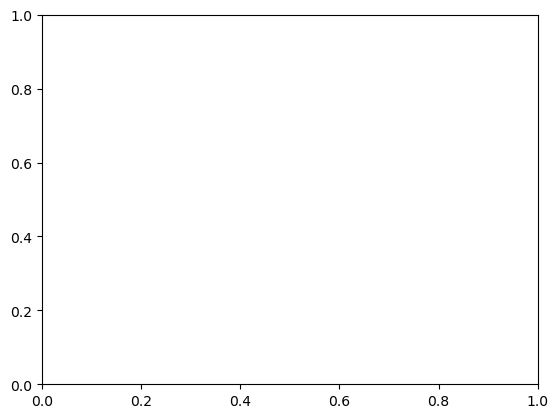

In [29]:
lights_geo.plot()

AttributeError: 'DataFrame' object has no attribute 'crs'

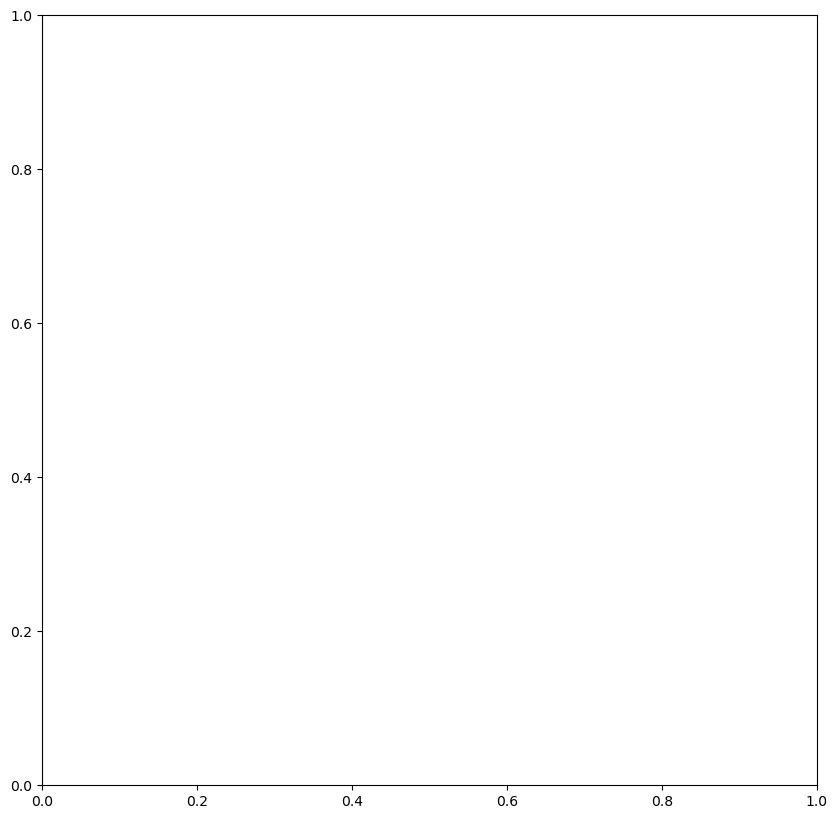

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
lights_geo.plot(column='density', ax=ax, legend=True)

plt.show()